# Model definition and analysis.

This example shows how to setup and analyze an RT1 model specification with the [rt1 python package](https://github.com/raphaelquast/rt1_model) .

> **NOTE:** to run this example you need the additional dependencies [matplotlib](https://matplotlib.org/) and [ipympl](https://matplotlib.org/ipympl/).

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from rt1_model import RT1, surface, volume, set_loglevel
set_loglevel("debug")

## Define the used volume- and surface-scattering phase function

In [2]:
# Parameterized HenyeyGreenstein function used as volume-scattering phase function
V = volume.HenyeyGreenstein(t="t_v", ncoefs=6)

# Parameterized linear-combination of BRDFs used as surface-scattering phase function
SRF = surface.LinComb(
    [
      ("x", surface.HG_nadirnorm(t="t_s", ncoefs=6, a=[1, 1, 1])),
      ("1 - x", surface.HG_nadirnorm(t="-t_s", ncoefs=6, a=[-1, 1, 1]))
    ]
    )

## Visualize distribution functions as polarplots

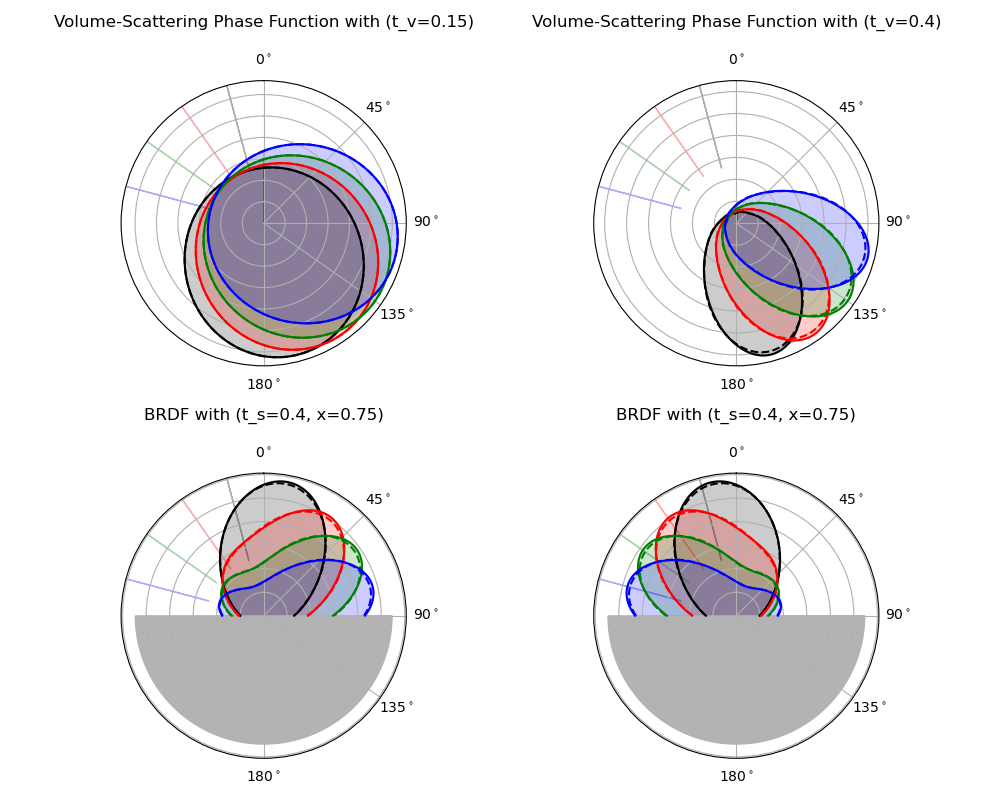

In [3]:
# visualize V and SRF as polarplots
f, axes = plt.subplots(2, 2, figsize=(10, 8), subplot_kw=dict(projection='polar'))
for ax, t_v in zip(axes[0], [0.15, 0.4]):
    V.polarplot(param_dict=dict(t_v=t_v), ax=ax, legend=False, label=f"Volume-Scattering Phase Function with (t_v={t_v})")
for ax, x, t_s in zip(axes[1], [0.75, 0.25], [0.4, 0.4]):
    SRF.polarplot(param_dict=dict(x=x, t_s=t_s), legend=False, groundcolor=".7", ax=ax, label=f"BRDF with (t_s={t_s}, x=0.75)")
f.tight_layout()
plt.show()

## Plot the incidence-angle dependency of the hemispherical reflectance of the BRDF

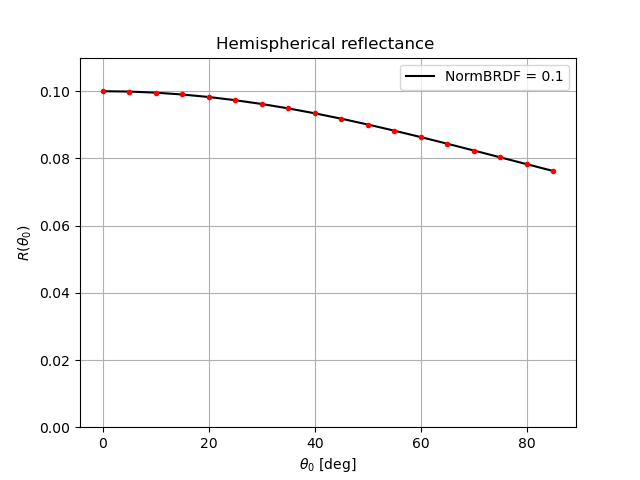

In [4]:
# check incidence-angle dependency of hemispherical reflectance of the surface BRDF
SRF.hemreflect(param_dict=dict(t_s=0.15, x=0.5, NormBRDF=0.1))

## Setup RT1 model and analyze resulting backscattering coefficient

In [5]:
# Setup RT1 model
R = RT1(V=V, SRF=SRF, int_Q=True, sig0=True, dB=True)

### Analyze monostatic backscattering coefficient

13:42:05.594 DEBUG: Generation of fnevals functions...
13:42:05.595 INFO: Evaluating coefficients for interaction-term...
13:42:05.745 DEBUG: Expansion calculated, it took 0.1496402999619022 sec.
13:42:05.845 INFO: Coefficients extracted, it took 0.09923 sec.


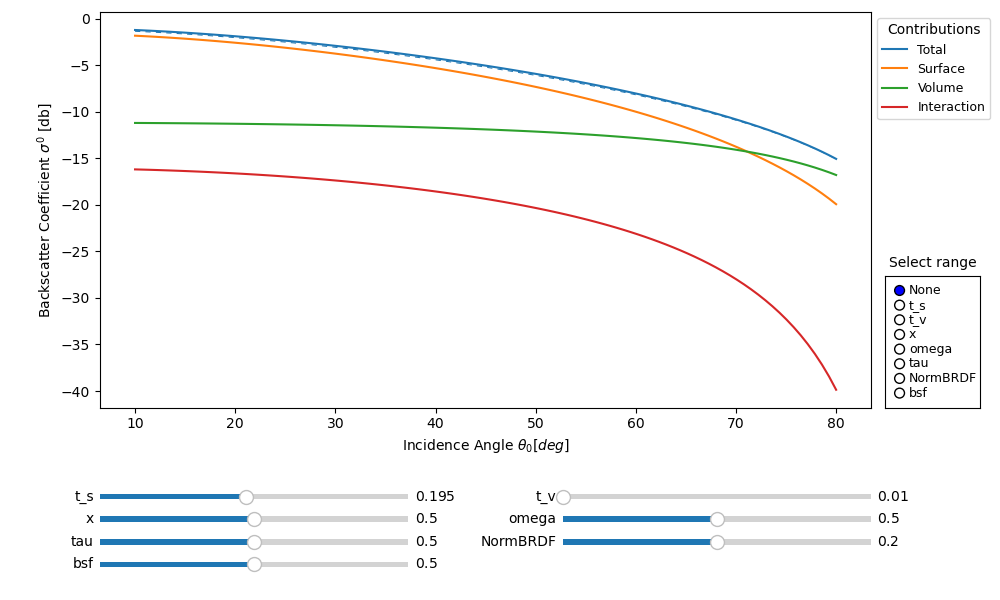

In [6]:
R.dB = True # Create monostatic plots in dB

# setup parameter ranges to analyze monostatic results
a1 = R.analyze(
    t_s=(0.01, 0.4),
    t_v=(0.01, 0.4, 0.01),
    x=(0, 1),
    omega=(0,1),
    tau=(0,1),
    NormBRDF=(0, .4),
    bsf=(0, 1)
    )

### Analyze 3D scattering distribution

13:42:06.136 WARNING: The analyze-plot shows results for bistatic geometry!


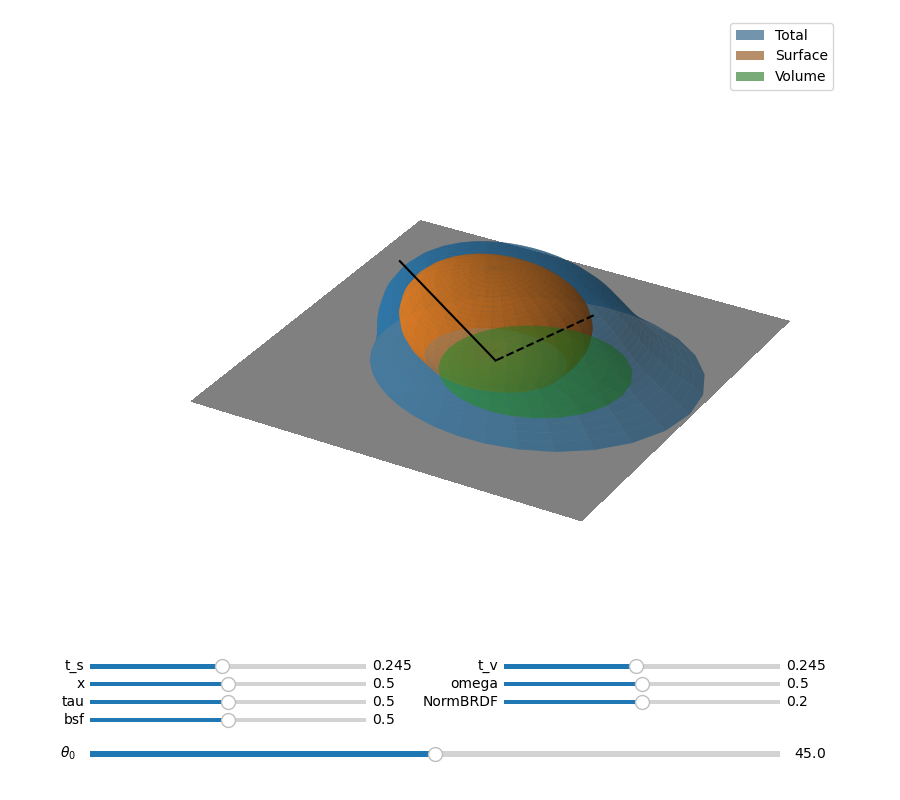

In [7]:
R.dB = False   # Create 3D plots in linear units

# setup parameter ranges to analyze bistatic results
a0 = R.analyze3d(
    contributions="tsv",
    t_s=(0.01, 0.5),
    t_v=(0.01, 0.5),
    x=(0, 1),
    omega=(0, 1),
    tau=(0, 1),
    NormBRDF=(0, 0.4),
    bsf=(0, 1),
)